In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset

In [3]:

data = pd.read_csv(r"C:/Users/ramiu/OneDrive/GenAi/ZeoTap Internship task/Products_EDA/Products.csv")

# Exploratory Data Analysis (EDA)

In [4]:
# Display dataset info
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None


In [5]:
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe(include='all'))


Summary Statistics:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000


In [6]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


# Visualize missing values

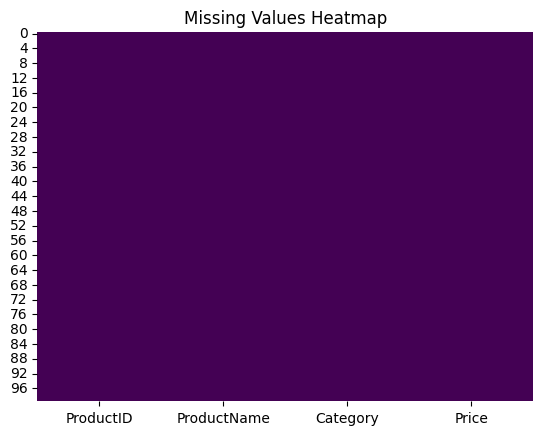

In [7]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [8]:
target_column = 'target'  # Replace with actual column
if target_column in data.columns:
    sns.countplot(data[target_column])
    plt.title("Target Variable Distribution")
    plt.show()


# Visualize correlations

In [9]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'P001'


Categorical Columns:
Index(['ProductID', 'ProductName', 'Category'], dtype='object')


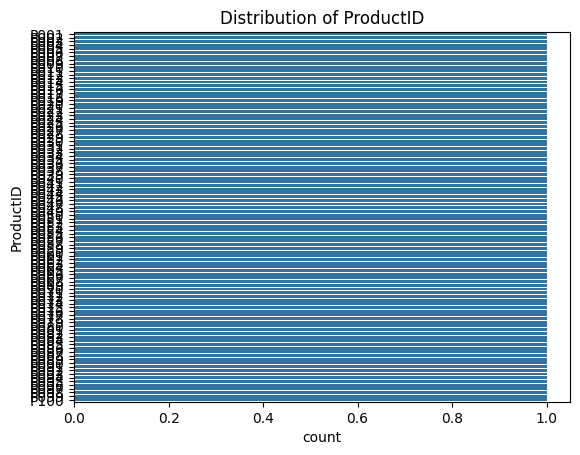

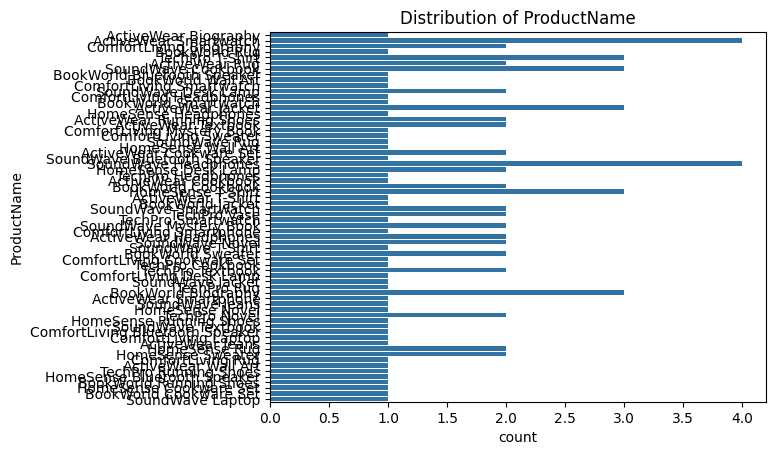

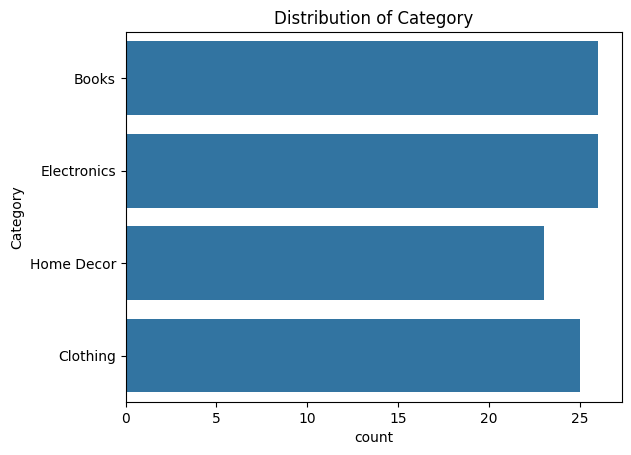

In [10]:
# Handling categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\nCategorical Columns:")
    print(categorical_cols)
    for col in categorical_cols:
        sns.countplot(data[col])
        plt.title(f"Distribution of {col}")
        plt.show()

In [11]:
# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [12]:
# Handle missing values (example: fill with median for numerical, mode for categorical)
data.fillna(data.median(numeric_only=True), inplace=True)

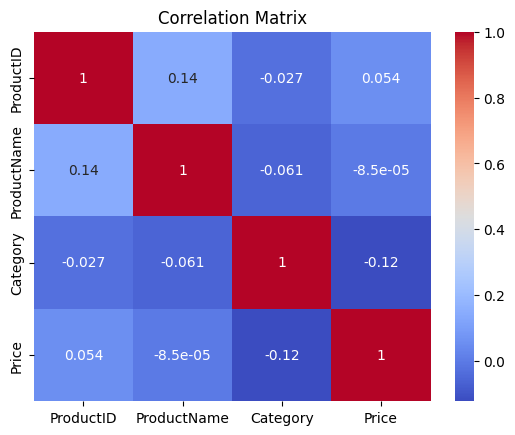

In [14]:
# Correlation Matrix (numerical columns only)
numerical_cols = data.select_dtypes(include=['float64', 'int']).columns
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [16]:
# Feature Engineering: Encoding categorical variables
data['Category_Encoded'] = data['Category'].astype('category').cat.codes

In [17]:
# Define features and target
# Assuming "Price" is the target variable (you can replace this with the actual target column)
X = data[['Category_Encoded']]
y = data['Price']


In [18]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Make predictions and evaluate
y_pred = model.predict(X_test)
print("\nModel Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")


Model Performance:
Mean Squared Error: 22341.45
R-squared: -0.13


In [24]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)


In [25]:

print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
            Feature  Importance
0  Category_Encoded         1.0


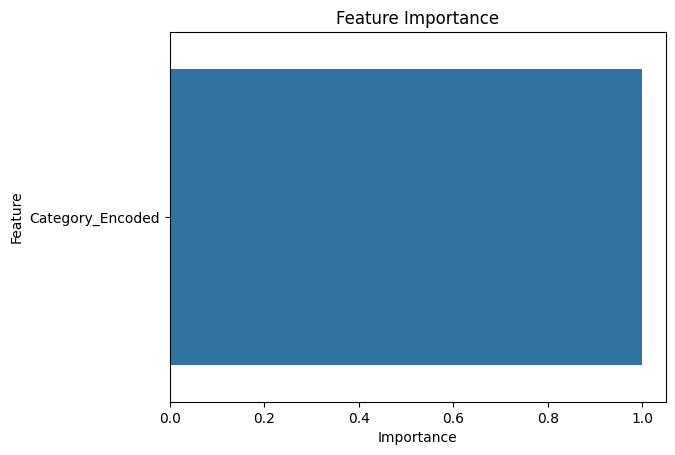

In [26]:
# Visualize feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()